## ML HT6 Project

In [5]:
1+1

2

In [6]:
!pip install -Uqq fastai


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
tensorflow 2.6.2 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
tensorflow 2.6.2 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.2 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.
tensorflow 2.6.2 requires wrapt~=1.12.1, but you have wrapt 1.13.3 which is incompatible.
tensorflow-transform 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tensorflow-transform 1.5.0 requires numpy<1.20,>=1.16, but you have numpy 1.20.3 which is incompatible.
tensorflow-transform 1.5.0 requires pyarrow<6,>=1, but you have p

In [7]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [8]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
featuretools 1.6.0 requires numpy>=1.21.0, but you have numpy 1.20.3 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.


## Phase 1


In [9]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Searching for 'sickle cell blood microscope'


/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


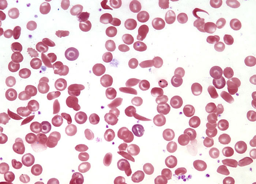

In [10]:
urls = search_images('sickle cell blood microscope', max_images=1)
urls[0]
from fastdownload import download_url
dest = 'sickleblood.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'thalassemia cell microscope images'


/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


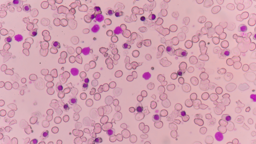

In [11]:
urls = search_images('thalassemia cell microscope images', max_images=2)
urls[1]

from fastdownload import download_url
dest = 'thalassemia.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'leukemia cell microscope images'


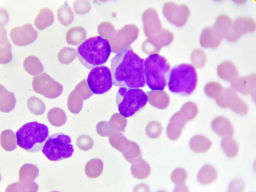

In [12]:
urls = search_images('leukemia cell microscope images', max_images=2)
urls[0]
from fastdownload import download_url
dest = 'leukemia.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'healthy blood cells microscope'


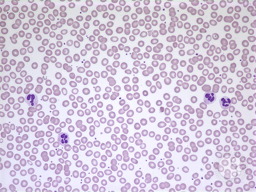

In [14]:
download_url(search_images('healthy blood cells microscope', max_images=1)[0], 'healthyblood.jpg', show_progress=False)
Image.open('healthyblood.jpg').to_thumb(256,256)

In [15]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=500):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [16]:
searches = 'sickle cell microscope', 'healthy blood cells microscope', 'thalassemia microscope images cell', 'leukemia microscope images cell'
path = Path('sickle_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} image'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} Peripheral Blood Smear image'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} 200x'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} 400x'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'sickle cell microscope image'
Searching for 'sickle cell microscope Peripheral Blood Smear image'
Searching for 'sickle cell microscope 200x'
Searching for 'sickle cell microscope 400x'


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:1018: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


Searching for 'healthy blood cells microscope image'
Searching for 'healthy blood cells microscope Peripheral Blood Smear image'
Searching for 'healthy blood cells microscope 200x'
Searching for 'healthy blood cells microscope 400x'
Searching for 'thalassemia microscope images cell image'
Searching for 'thalassemia microscope images cell Peripheral Blood Smear image'
Searching for 'thalassemia microscope images cell 200x'
Searching for 'thalassemia microscope images cell 400x'
Searching for 'leukemia microscope images cell image'
Searching for 'leukemia microscope images cell Peripheral Blood Smear image'
Searching for 'leukemia microscope images cell 200x'
Searching for 'leukemia microscope images cell 400x'


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:1018: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


Searching for 'iron deficiency anemia microscope images cell image'
Searching for 'iron deficiency anemia microscope images cell Peripheral Blood Smear image'
Searching for 'iron deficiency anemia microscope images cell 200x'
Searching for 'iron deficiency anemia microscope images cell 400x'


In [17]:
## Phase 2

In [23]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

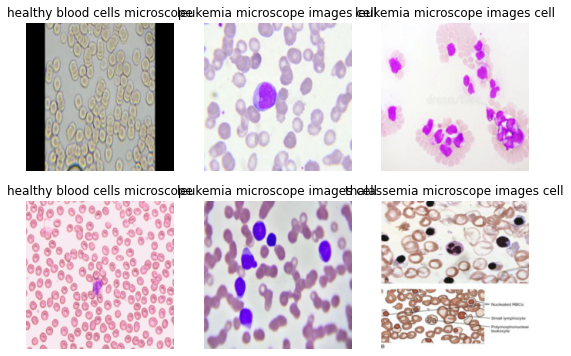

In [24]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [27]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,2.087371,1.119762,0.368254,00:07


epoch,train_loss,valid_loss,error_rate,time
0,1.328909,0.959706,0.326984,00:07
1,1.098830,0.913056,0.282540,00:08
2,0.914046,0.878901,0.273016,00:07
3,0.813509,1.052124,0.263492,00:07
4,0.745887,1.030438,0.282540,00:07
5,0.708067,1.060619,0.279365,00:08
6,0.620474,1.038140,0.295238,00:07
7,0.540533,1.076558,0.298413,00:07
8,0.492166,1.172053,0.263492,00:07
9,0.459155,1.093609,0.269841,00:08


In [21]:
learn.export('014modelwithanemia.pkl')

## Phase 3

This is a: sickle cell microscope.
Probability it's healthy blood cell: 0.0002
Probability it's sickle blood cells: 0.0009
Probability it's leukemia blood cells: 0.0001
Probability it's thalassemia blood cells: 0.9984


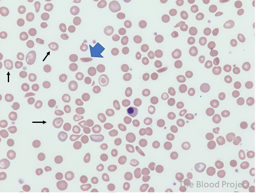

In [22]:
photolink = '/kaggle/input/sickle-cell-images/image-147.webp'
is_sickle,_,probs = learn.predict(PILImage.create(photolink))
if probs[0] > 0.7 or probs[1] >0.7 or probs[2] > 0.7 or probs[3] > 0.7: 
    print(f"This is a: {is_sickle}.")
elif probs[2] > probs[1] and probs[2] > 0.7 and probs[1] > 0.5:
    print("It is most likely that there are thalassemia blood cells with a risk of sickle cells")
elif probs[1] > probs[2] and probs[1] > 0.7 and probs[2] > 0.5:
    print("It is most likely that there are sickle blood cells with a risk of thalassemia cells")
else:
    print("There is not enough information to identify")
print(f"Probability it's healthy blood cell: {probs[0]:.4f}")
print(f"Probability it's sickle blood cells: {probs[1]:.4f}")
print(f"Probability it's leukemia blood cells: {probs[2]:.4f}")
print(f"Probability it's thalassemia blood cells: {probs[3]:.4f}")
Image.open(photolink).to_thumb(256,256)
